# Project 3
## Kelsea Figaro
## 12/10/25
### Use API to analyze yelp reviews of Italian Restaurants and Korean Restaurants in Tampa,Fl
### Question: Do Tampa residents have a perference (most postive reviews) of the local Italian or Korean Restaurants 

In [1]:
import requests

from bs4 import BeautifulSoup

from textblob import TextBlob

import yelpkeys

import nltk

from textblob.sentiments import NaiveBayesAnalyzer

In [2]:
APIKEY = yelpkeys.api_key
headers = {'Authorization': 'Bearer %s' % yelpkeys.api_key,}

## Query the reviews on yelp for both of the italian restaurants in Tampa and the korean restaurants in Tampa

In [3]:
"""
Yelp Fusion API code sample.
This program demonstrates the capability of the Yelp Fusion API
by using the Search API to query for businesses by a search term and location,
and the Business API to query additional information about the top result
from the search query.
Please refer to https://docs.developer.yelp.com/docs/get-started for the API
documentation.
This program requires the Python requests library, which you can install via:
`pip install -r requirements.txt`.
Sample usage of the program:
`python sample.py --term="bars" --location="San Francisco, CA"`
"""
from __future__ import print_function

import argparse
import json
import pprint
import requests
import sys
import urllib


# This client code can run on Python 2.x or 3.x.  Your imports can be
# simpler if you only need one of those.
try:
    # For Python 3.0 and later
    from urllib.error import HTTPError
    from urllib.parse import quote
    from urllib.parse import urlencode
except ImportError:
    # Fall back to Python 2's urllib2 and urllib
    from urllib2 import HTTPError
    from urllib import quote
    from urllib import urlencode


# Yelp Fusion no longer uses OAuth as of December 7, 2017.
# You no longer need to provide Client ID to fetch Data
# It now uses private keys to authenticate requests (API Key)
# You can find it on
# https://www.yelp.com/developers/v3/manage_app
API_KEY= yelpkeys.api_key


# API constants, you shouldn't have to change these.
API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'  # Business ID will come after slash.


# Defaults for our simple example.
DEFAULT_TERM = 'italian'
DEFAULT_LOCATION = 'Tampa,FL'
SEARCH_LIMIT = 10
DEFAULT_TERM2='korean'

def request(host, path, api_key, url_params=None):
    """Given your API_KEY, send a GET request to the API.
    Args:
        host (str): The domain host of the API.
        path (str): The path of the API after the domain.
        API_KEY (str): Your API Key.
        url_params (dict): An optional set of query parameters in the request.
    Returns:
        dict: The JSON response from the request.
    Raises:
        HTTPError: An error occurs from the HTTP request.
    """
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }

    print(u'Querying {0} ...'.format(url))

    response = requests.request('GET', url, headers=headers, params=url_params)

    return response.json()


def search(api_key, term, location):
    """Query the Search API by a search term and location.
    Args:
        term (str): The search term passed to the API.
        location (str): The search location passed to the API.
    Returns:
        dict: The JSON response from the request.
    """

    url_params = {
        'term': term.replace(' ', '+'),
        'location': location.replace(' ', '+'),
        'limit': SEARCH_LIMIT
    }
    return request(API_HOST, SEARCH_PATH, api_key, url_params=url_params)


def get_business(api_key, business_id):
    """Query the Business API by a business ID.
    Args:
        business_id (str): The ID of the business to query.
    Returns:
        dict: The JSON response from the request.
    """
    business_path = BUSINESS_PATH + business_id

    return request(API_HOST, business_path, api_key)


def query_api(term, location):
    """Queries the API by the input values from the user.
    Args:
        term (str): The search term to query.
        location (str): The location of the business to query.
    """
    response = search(API_KEY, term, location)

    businesses = response.get('businesses')

    if not businesses:
        print(u'No businesses for {0} in {1} found.'.format(term, location))
        return

    business_id = businesses[0]['id']

    print(u'{0} businesses found, querying business info ' \
        'for the top result "{1}" ...'.format(
            len(businesses), business_id))
    response = get_business(API_KEY, business_id)

    print(u'Result for business "{0}" found:'.format(business_id))
    pprint.pprint(response, indent=2)

In [4]:
responseit = search(API_KEY,DEFAULT_TERM, 'Tampa,Fl')
responsekor= search(API_KEY,DEFAULT_TERM2,'Tampa,Fl')

Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...


In [5]:
for business in responseit['businesses']:
    #print(response)
    print('Business Name: ' + business['name'])
    print('Rating: ' + str(business['rating']))
    print('Review Count: ' + str(business['review_count']))
    print('Reviews: ')
    BUS_REVIEW='/v3/businesses/{}/reviews'.format(business['id'])
    #print('https://api.yelp.com/v3/businesses/{}/reviews?limit=20&sort_by=yelp_sort'.format(business['id']))
    reviews = request(API_HOST,BUS_REVIEW, API_KEY)
    totalposit=0
    totalnegit=0
    totalneuit=0
    for review in reviews['reviews']:
        print(' - ' + review['text'])
        # Perform sentiment analysis on the review using TextBlob
        blob = TextBlob(review['text'])
        sentiment = blob.sentiment.polarity
        if sentiment > 0:
            totalposit+=1
            print('    Sentiment: Positive')
        elif sentiment < 0:
            totalnegit+=1
            print('    Sentiment: Negative')
        else:
           totalneuit+=1
           print('    Sentiment: Neutral')
        print('\n================\n\n\n')

Business Name: OLIVIA
Rating: 4.5
Review Count: 1561
Reviews: 
Querying https://api.yelp.com/v3/businesses/9JrZDH4Mq0BXQ2GYIJmo-g/reviews ...
 - Another great meal at Olivia. This time I made a point to try their $16 Espresso Martinis and it was a solid 7/10. Not my favorite, but not bad either. We...
    Sentiment: Positive




 - Very nice restaurant just west of Tampa. The indoor area is gorgeous and feels both elegant and inviting at the same time. The food is very good. It spends...
    Sentiment: Positive




 - Five stars for impressing someone raised on homemade authentic Italian food. OLIVIA lives up to the hype! Not only do they serve up award-winning cocktails,...
    Sentiment: Positive




Business Name: Piccola Italia Bistro
Rating: 4.5
Review Count: 401
Reviews: 
Querying https://api.yelp.com/v3/businesses/zjqh_qoBS1BWVSbC51BNjw/reviews ...
 - I had one bite and I was like, "okay yeah this might be my new favorite Italian restaurant." First off, I agree with a lot of oth

### Convert to a donut chart for Italian restaurants

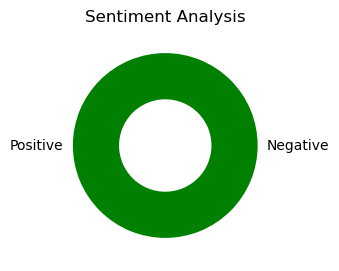

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define data

labels = ['Positive', 'Negative']
values = [totalposit, totalnegit]

# Create donut chart
fig, ax = plt.subplots(figsize=(3, 3))
ax.pie(values, labels=labels, wedgeprops=dict(width=0.5), colors=['green', 'red'])
ax.set_title('Sentiment Analysis')

plt.show()

In [7]:
for business in responsekor['businesses']:
    #print(response)
    print('Business Name: ' + business['name'])
    print('Rating: ' + str(business['rating']))
    print('Review Count: ' + str(business['review_count']))
    print('Reviews: ')
    BUS_REVIEW='/v3/businesses/{}/reviews'.format(business['id'])
    #print('https://api.yelp.com/v3/businesses/{}/reviews?limit=20&sort_by=yelp_sort'.format(business['id']))
    reviews = request(API_HOST,BUS_REVIEW, API_KEY)
    totalposkor=0
    totalnegkor=0
    totalneukor=0
    for review in reviews['reviews']:
        print(' - ' + review['text'])
        # Perform sentiment analysis on the review using TextBlob
        blob = TextBlob(review['text'])
        sentiment = blob.sentiment.polarity
        if sentiment > 0:
            totalposkor+=1
            print('    Sentiment: Positive')
        elif sentiment <0:
            totalnegkor+=1
            print('    Sentiment: Negative')
        else:
            totalneukor+=1
            print('    Sentiment: Neutral')
        print('\n================\n\n\n')

Business Name: Soul Of Korea
Rating: 4.3
Review Count: 368
Reviews: 
Querying https://api.yelp.com/v3/businesses/823XwYHayzm0Kufem5E1Aw/reviews ...
 - My husband and I (both veterans) had the pleasure of dining at Soul of Korea, and it did not disappoint! As a veteran-owned business, this spot instantly...
    Sentiment: Neutral




 - The soy bean side dish has gone bad. I pointed it out and the lady behind the counter said it's not because they made it that morning. I can't dispute when...
    Sentiment: Negative




 - The food was ok. In the fried rice-- the chicken was a little tough and the rice had an aftertaste. The bulgogi was tender and good overall. I just wish the...
    Sentiment: Positive




Business Name: Sa Ri One Restaurant
Rating: 4.1
Review Count: 694
Reviews: 
Querying https://api.yelp.com/v3/businesses/CU75YM3XOAQ4lO12eWdlcA/reviews ...
 - The food was great. The Kelbi was cooked well and it tasted like it was barbecued. 

I also was impressed by the variety of dr

### Donut Chart for Korean restaurants

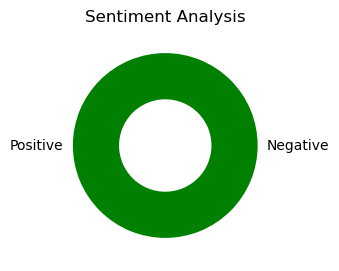

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define data

labels = ['Positive', 'Negative']
values = [totalposkor, totalnegkor]

# Create donut chart
fig, ax = plt.subplots(figsize=(3, 3))
ax.pie(values, labels=labels, wedgeprops=dict(width=0.5), colors=['green', 'red'])
ax.set_title('Sentiment Analysis')

plt.show()

# Sentiment Analysis for Italian restaurants

In [9]:
text=str(responseit)
blob=TextBlob(text)


In [10]:
for s in blob.sentences:
  print(s.sentiment)

Sentiment(polarity=-0.5682795698924731, subjectivity=0.7403225806451612)


## Naive Bayes Analyzer For Italian restaurants in Tampa

In [11]:
blob2 = TextBlob(text,analyzer=NaiveBayesAnalyzer())


In [12]:
for s in blob2.sentences:
  print(s.sentiment)

Sentiment(classification='pos', p_pos=0.9998652160692453, p_neg=0.00013478393074865407)


### Analysis: While the default text blob analyzer and the Naive Bayes analyzer both show postive results, the Naive Bayes Analyzer shows a stronger positive result

## Sentiment Analysis for Korean restaurants in Tampa,Fl

In [13]:
text2=str(responsekor)
blob3=TextBlob(text2)


In [14]:
for s in blob3.sentences:
  print(s.sentiment)

Sentiment(polarity=-0.7, subjectivity=0.9296052631578948)


## Naive Bayes Analyzer For Korean restaurants in Tampa,Fl

In [15]:
blob4 = TextBlob(text2,analyzer=NaiveBayesAnalyzer())

In [16]:
for s in blob4.sentences:
  print(s.sentiment)

Sentiment(classification='pos', p_pos=0.6913662779400858, p_neg=0.30863372205990525)


### Analysis: Simuraly to the italian resturants, both the default text blob amalyzer and the naive bayes analyzer show positive results, however this time it appears that the default text blob analyzer shows a slightly more postive result

# Compare the results between the two restaurants

### Answer: It appears that Italain Resturants in Tampa,Fl tend to have more postive reviews compared to the Korean Resturants in the area

# Delete the stop words and create a wordcloud for both the italian and korean restaurants

In [17]:
from nltk.corpus import stopwords
import json
from pathlib import Path
from operator import itemgetter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### Export the dictionaries to txt files using json

### I used chatgpt for this part and my prompt was "i have a python dict named responseit. I need to convert it to a txt file using json"

In [18]:
with open("italian.txt", "w") as file:
    json.dump(responseit, file, indent=4)

In [19]:
with open("korean.txt", "w") as file:
    json.dump(responsekor, file, indent=4)

In [20]:
stop_words = stopwords.words('english')

In [21]:
textit= TextBlob(Path('italian.txt').read_text())
itemsit = textit.word_counts.items()
print(len(itemsit))

234


In [22]:
itemsit = [item for item in itemsit if item[0] not in stop_words]
len(itemsit)

233

## create top 20 list for italian resturants

In [23]:
sorted_items = sorted(itemsit, key=itemgetter(1), reverse=True)
top_20it = sorted_items[0:21]
top_20it

[('alias', 31),
 ('tampa', 22),
 ('title', 21),
 ('https', 20),
 ('fl', 20),
 ('italian', 19),
 ('ave', 12),
 ('latitude', 11),
 ('longitude', 11),
 ('id', 10),
 ('name', 10),
 ('image_url', 10),
 ('is_closed', 10),
 ('false', 10),
 ('url', 10),
 ('adjust_creative=istl9jgw2i0hp64eidomvq', 10),
 ('utm_campaign=yelp_api_v3', 10),
 ('utm_medium=api_v3_business_search', 10),
 ('utm_source=istl9jgw2i0hp64eidomvq', 10),
 ('review_count', 10),
 ('categories', 10)]

In [44]:
df = pd.DataFrame(top_20it, columns=['word','count'])

## drop values that aren't words

In [25]:
df = df.drop(df.index[14])

In [26]:
df = df.drop(df.index[15])

In [27]:
df = df.drop(df.index[17])

In [28]:
df = df.drop(df.index[2])

In [29]:
df = df.drop(df.index[10])

### create the world cloud

In [30]:
wordcloud = WordCloud(colormap='prism',background_color='white', max_words=20)
textita = Path('italian.txt').read_text()
wordcloud = wordcloud.generate(text)
wordcloud = wordcloud.to_file('italian.png')

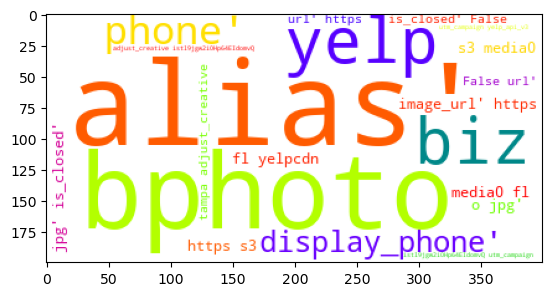

In [31]:
plt.imshow(wordcloud)

## Create a top 20 word list for korean restaurants

In [38]:
itemskor = [item for item in itemskor if item[0] not in stop_words]
len(itemskor)

227

In [39]:
sorted_items = sorted(itemskor, key=itemgetter(1), reverse=True)
top_20kor = sorted_items[0:21]
top_20kor

[('alias', 27),
 ('korean', 24),
 ('https', 20),
 ('fl', 20),
 ('title', 17),
 ('tampa', 16),
 ('latitude', 11),
 ('longitude', 11),
 ('id', 10),
 ('name', 10),
 ('image_url', 10),
 ('is_closed', 10),
 ('false', 10),
 ('url', 10),
 ('adjust_creative=istl9jgw2i0hp64eidomvq', 10),
 ('utm_campaign=yelp_api_v3', 10),
 ('utm_medium=api_v3_business_search', 10),
 ('utm_source=istl9jgw2i0hp64eidomvq', 10),
 ('review_count', 10),
 ('categories', 10),
 ('rating', 10)]

In [40]:
df2 = pd.DataFrame(top_20kor, columns=['word','count'])

### create the word cloud for korean restaurants

In [42]:
wordcloud = WordCloud(colormap='prism',background_color='white', max_words=20)
textkora = Path('korean.txt').read_text()
wordcloud2 = wordcloud.generate(text)
wordcloud2 = wordcloud.to_file('korean.png')

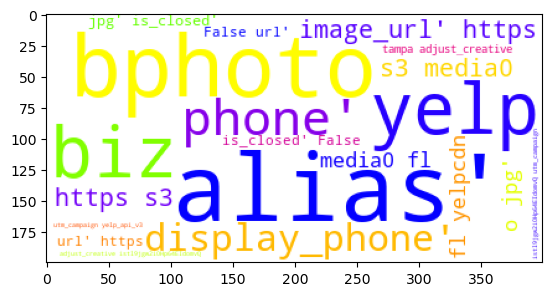

In [43]:
plt.imshow(wordcloud2)

## I acknowledge that something went wrong somewhere that I am not seeing the review words for neither or the italian or korean restaurants

# Conclusion

### Based on the text blob analysis, italian restaurants have more favorable reviews then the korean restaurants